In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities from citipy
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
city_count

654

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [3]:
#Gather weather data from openweathermap api and fill the appropriate lists
weatherCities = []
lat = []
lon = []
temp = []
hum = []
cloud = []
wspeed = []
country = []
edate = []

#Set up the url information
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities[0:50]:
    try:
        response = requests.get(query_url + city).json()
        weatherCities.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"]) #the starter code refers to "Max Temp", not "Temp"
        hum.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wspeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        edate.append(response["dt"])
        
        index = cities.index(city)
        print(f"Processing record {index + 1} of {city_count} | {city}") 
        
    except: 
        print(f"City {city} not found. Skipping City.")
        pass

Processing record 1 of 654 | domoni
Processing record 2 of 654 | hobart
Processing record 3 of 654 | new norfolk
Processing record 4 of 654 | saint george
Processing record 5 of 654 | jamestown
Processing record 6 of 654 | kapaa
Processing record 7 of 654 | bend
Processing record 8 of 654 | north bend
Processing record 9 of 654 | san quintin
City amderma not found. Skipping City.
City attawapiskat not found. Skipping City.
City taolanaro not found. Skipping City.
Processing record 13 of 654 | yumen
Processing record 14 of 654 | strezhevoy
Processing record 15 of 654 | karratha
Processing record 16 of 654 | bluff
Processing record 17 of 654 | yatou
City mys shmidta not found. Skipping City.
Processing record 19 of 654 | kamenka
City illoqqortoormiut not found. Skipping City.
Processing record 21 of 654 | jinchang
City tsihombe not found. Skipping City.
Processing record 23 of 654 | havre-saint-pierre
Processing record 24 of 654 | cape town
Processing record 25 of 654 | kovdor
Processing

In [4]:
#Create the dictionary of weather information for each city, and then convert to data frame and display    
weather_dict = {
    "City": weatherCities,
    "Latitude": lat,
    "Max Temp (F)": temp,
    "Humidity (%)": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (mph)": wspeed,
    "Country": country,
    "Date": edate
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Domoni,-12.2569,79.59,85,100,4.50,KM,1643929758
1,Hobart,-42.8794,65.01,57,75,3.00,AU,1643929612
2,New Norfolk,-42.7826,66.65,47,11,1.99,AU,1643929749
3,Saint George,37.1041,48.79,20,0,16.11,US,1643929758
4,Jamestown,42.0970,27.72,69,100,7.00,US,1643929538


In [5]:
#Create scatter plots
list = ["Max Temp (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]

In [72]:
#Define a function that will create a scatter plot and save it
def scattered(xlabel, ylabel, lat_range, savename):
    plt.figure()
    plt.scatter(weather_data[xlabel], weather_data[ylabel], marker = "o")
    plt.grid()
    plt.xlabel(xlabel)
    plt.xlim(lat_range[0], lat_range[1])
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs {xlabel}")
    
    #Save the figure
    plt.savefig("output_data/"+ savename)
    
    #Display the figure
    plt.show()
    

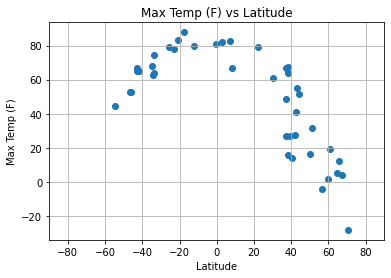

In [74]:
# Temperature (F) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Max Temp (F)"
savename = "MaxTvsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, savename)

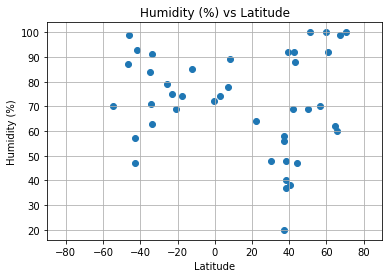

In [75]:
# Humidity (%) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Humidity (%)"
savename = "HumVsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, savename)

In [40]:
#Create separate data frames for the northern and southern hemispheres
north_weather_data = weather_data[weather_data["Latitude"] >= 0]
south_weather_data = weather_data[weather_data["Latitude"] < 0]

#Create a data frame for the xlim values for the scatter plots below
xaxis = pd.DataFrame({"Northern": (0, 80), "Southern": (-60, 0)})

In [50]:
#Define a function that will output the r-value, scatter plot, linear regression line, and linear regression equation

def linreg(hemisphere, xlabel, ylabel, annoloc):

    if hemisphere == "Northern":
        xvalues = north_weather_data[xlabel]
        yvalues = north_weather_data[ylabel]
    else:     
        xvalues = south_weather_data[xlabel]
        yvalues = south_weather_data[ylabel]
        
    #Format the scatter plot
    plt.figure()
    plt.title(f"{hemisphere} Hemisphere: {ylabel} vs {xlabel}")
    xlim = xaxis[hemisphere] #pull the xlim values from a data frame
    plt.xlim(xlim)
    plt.scatter(xvalues, yvalues, marker = "o")
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    #Calculate everything needed for the linear regression line
    (slope, intercept, rvalue, pvalue, stdder) = linregress(xvalues, yvalues)
    line = slope * xvalues + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Format the linear regression line plot
    plt.plot(xvalues, line, color = "red")
    plt.annotate(line_eq, annoloc, fontsize = 15, color = "red")

    #Show r-value and the plot
    print(f"The r-value is {round(rvalue, 4)}")
    plt.show();

The r-value is -0.8449


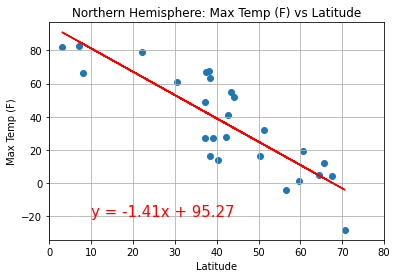

analysis


In [59]:
# Northern Hemisphere - Temperature (F) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Max Temp (F)"
annoloc = (10,-20)   #annotation location for the linear regression equation

#Call on the user-defined linreg function
linreg(hemisphere, xlabel, ylabel, annoloc)

print("analysis")

The r-value is 0.8727


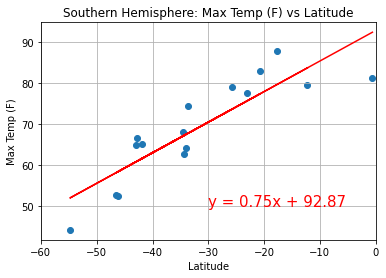

In [52]:
#Southern Hemisphere - Temperature (F) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Max Temp (F)"
annoloc = (-30, 50)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc)

The r-value is 0.227


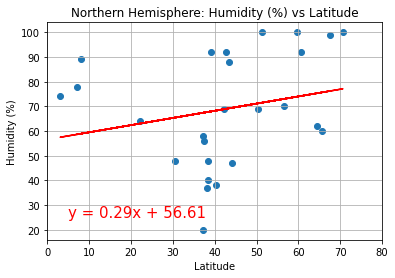

In [53]:
#Northern Hemisphere - Humidity (%) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Humidity (%)"
annoloc = (5,25)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc)

The r-value is -0.0179


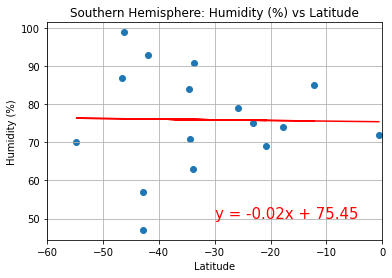

In [54]:
#Southern Hemisphere - Humidity (%) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Humidity (%)"
annoloc = (-30,50)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc)

The r-value is 0.2549


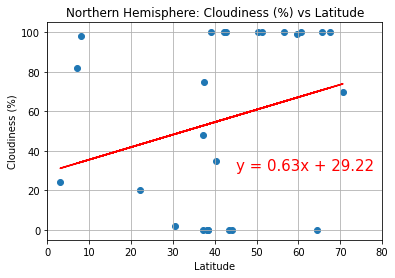

In [55]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
annoloc = (45,30)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc)

The r-value is 0.0264


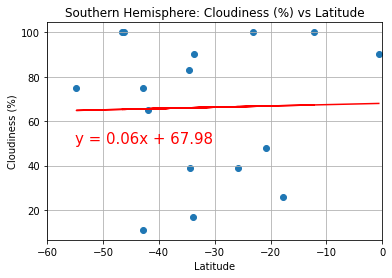

In [56]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
annoloc = (-55,50)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc)

The r-value is -0.0105


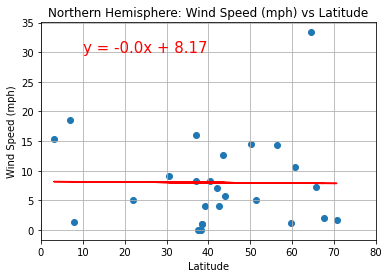

In [57]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
annoloc = (10,30)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc)

The r-value is 0.0851


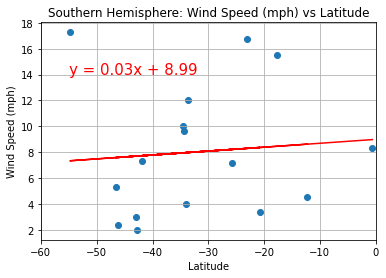

In [58]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
annoloc = (-55, 14)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc)